In [1]:
!pip install --upgrade pip #upgrade pip package installer
!pip install scikit-learn --upgrade #upgrade scikit-learn package
!pip install numpy --upgrade #upgrade numpy package
!pip install pandas --upgrade #upgrade pandas package
import warnings
warnings.filterwarnings('ignore')
from IPython.display import HTML

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (18.1)
Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.20.1)
Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.15.4)
Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (0.23.4)


# **                              Εργαστήριο “Νευρωνικά Δίκτυα & Ευφυή Υπολογιστικά Συστήματα” 2018-2019**

#                 Άσκηση 1. Επιβλεπόμενη Μάθηση: Ταξινόμηση.
**Μελέτη datasets του UCI Machine Learning Repository**
**Dataset = ISOLET (B12)**


# Α. Στοιχεία ομάδας
**Μέλη ομάδας:**

- **Ονοματεπώνυμο: Γεώργιος Σουλιώτης - ΑΜ: 03114201**

- **Ονοματεπώνυμο: Νικόλαος-Ιωάννης Τιτομιχελάκης - ΑΜ: 03114805**

**Αριθμός Ομάδας: Α10**

# Β. Εισαγωγή του dataset


**1. Περιγραφή του Dataset**

Το συγκεκριμένο dataset περιλαμβάνει ηχογραφήσεις 150 εκφωνητών, οι οποίοι είπαν τα 26 γράμματα του αγγλικού αλφαβήτου 2 φορές.
Το dataset είναι χωρισμένο σε 5 αρχεία και το κάθε αρχείο περιέχει 30 εκφωνητές. Λόγω μάλλον αρκετού θορύβου στις ηχογραφήσεις, **3** εκφωνήτες έχουν αποσυρθεί.

**2. Αριθμός δειγμάτων και χαρακτηριστικών, είδος χαρακτηριστικών**

Ο αριθμός των δειγμάτων του dataset είναι **7797** και των χαρακτηριστικών είναι **617**.

Το είδος των χαρακτηριστικών που περιλαμβάνονται είναι integers, floats καθώς και ints. Το dataset δεν περιέχει μη διατεταγμένα χαρακτηριστικά.

**3. Υπάρχουν επικεφαλίδες; Αρίθμηση γραμμών;**

Όχι δεν υπάρχουν επικεφαλίδες ή αρίθμηση γραμμών στο dataset.

**4. Ποιες είναι οι ετικέτες των κλάσεων και σε ποια κολόνα βρίσκονται;**

Η ετικέτα των κλάσεων του dataset είναι το χαρακτηριστικό το οποίο βρίσκεται στην τελευταία κολόνα και παίρνει τιμές απο 1 έως 26 όσα δηλαδή και τα γράμματα του αγγλικού αλφαβήτου.

**5. Χρειάστηκε να κάνετε μετατροπές στα αρχεία text και ποιες?**

Χρειάστηκε να κάνουμε ένωση των 2 dataset καθώς ήταν χωρισμένα σε δύο διαφορετικά αρχεία. Το concatenatιον έγινε με την εντολή:
***cat *.data > all.csv***

**6. Υπάρχουν απουσιάζουσες τιμές; Πόσα είναι τα δείγματα με απουσιάζουσες τιμές και ποιο το ποσοστό τους επί του συνόλου;**

Όχι δεν υπάρχουν απουσιάζουσες τιμές.

**7. Ποιος είναι ο αριθμός των κλάσεων και τα ποσοστά δειγμάτων τους επί του συνόλου; Εκτιμήστε την ισσοροπία του dataset**

Στο παρών dataset υπάρχουν 26 κλάσεις.

In [2]:
import pandas as pd
import numpy as np

# from ibm_botocore.client import Config
# import ibm_boto3
# #Εισαγωγή του dataset στο Notebook απο την πλατφορμα IBM WATSON.
# def __iter__(self): return 0

# # @hidden_cell
# # The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# # You might want to remove those credentials before you share your notebook.
# client_587927642c4e46b4843aa8bb64ed179a = ibm_boto3.client(service_name='s3',
#     ibm_api_key_id='8eFSxPtWnz967BGWbR9ogxxi7ShLebS-Bq7psPMxVK80',
#     ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
#     config=Config(signature_version='oauth'),
#     endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

# body = client_587927642c4e46b4843aa8bb64ed179a.get_object(Bucket='ask1-donotdelete-pr-q8u2z4arfnlp9r',Key='all.csv')['Body']
# # add missing __iter__ method, so pandas accepts body as file-like object
# if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
CSV_filename = "all.csv"
df = pd.read_csv(CSV_filename, header=None)
labels = df[df.columns[-1]].copy() #Εισαγωγη των κλασεων στον πινακα labels
features = df[df.columns[:-1]].copy()#Εισαγωγη των χαρακτηριστικων στον πινακα features
counts = labels.value_counts().to_dict()
print(counts)

{25.0: 300, 23.0: 300, 2.0: 300, 3.0: 300, 4.0: 300, 5.0: 300, 7.0: 300, 8.0: 300, 9.0: 300, 10.0: 300, 11.0: 300, 12.0: 300, 1.0: 300, 14.0: 300, 15.0: 300, 16.0: 300, 18.0: 300, 20.0: 300, 22.0: 300, 24.0: 300, 26.0: 300, 17.0: 300, 19.0: 300, 21.0: 300, 13.0: 299, 6.0: 298}


Από πάνω βλέπουμε ότι υπάρχουν **300** (**3,08%** του δείγματος καταλαμβάνει κάθε γράμμα) δείγματα για κάθε ένα από τα γράμματα της αλφαβήτου. Εξαίρεση αποτελούν τα γράμματα **F** και **M**, τα οποία έχουν 298 και 299 δείγματα αντίστοιχα, καθώς όπως προαναφέρθηκε, 3 δείγματα έχουν αφαιρεθεί από το dataset λόγω θορύβου στην ηχογράφηση. Επομένως **κάθε** κλάση καταλαμβάνει το **3,08%** του δείγματός μας, άρα το δείγμα μας **είναι ισορροπημένο**


**8. Διαχωρίστε σε train και test set. Εάν υπάρχουν απουσιάζουσες τιμές και μη διατεταγμένα χαρακτηριστικά διαχειριστείτε τα και αιτιολογήστε τις επιλογές σας.**

Στο δείγμα μας δεν υπάρχουν απουσιάζουσες τιμές ή διατεταγμένα χαρακτηριστικά. Θα χωρίσουμε το δείγμα μας σε train set (70%) και test set(30%). Για το train set δημιουργήσαμε τον πίνακα **features** και για το test set τον πίνακα **labels**

In [0]:
from sklearn.model_selection import train_test_split
# Split our data
train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.3)
from sklearn.dummy import DummyClassifier
dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
dc_constant_2 = DummyClassifier(strategy="constant", constant=2)
dc_constant_3 = DummyClassifier(strategy="constant", constant=3)
dc_constant_4 = DummyClassifier(strategy="constant", constant=4)
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")

In [0]:
#Βιβλιοθηκη για τη σχεδιαση των Confusion Matrix
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# **Γ. Baseline classification**

Θα εκπαιδεύσουμε τους Classifiers στο train set με default τιμές.

In [5]:
isolet_accuracy = {}
model = dc_uniform.fit(train, train_labels)
isolet_accuracy['uniform (random)'] = dc_uniform.score(test, test_labels)
model = dc_constant_1.fit(train, train_labels)
isolet_accuracy['constant 1'] = dc_constant_1.score(test, test_labels)
model = dc_constant_2.fit(train, train_labels) 
isolet_accuracy['constant 2'] = dc_constant_2.score(test, test_labels)
model = dc_constant_3.fit(train, train_labels) 
isolet_accuracy['constant 3'] = dc_constant_3.score(test, test_labels)
model = dc_constant_4.fit(train, train_labels) 
isolet_accuracy['constant 4'] = dc_constant_4.score(test, test_labels)
model = dc_most_frequent.fit(train, train_labels)
# Χρησιμοποιουνται ταξινομητες για τις 4 πρωτες κλασεις. Οι υπολοιποι παραλειπονται καθως ειναι εμφανες πως τα αποτελεσματα θα ειναι ιδια
#για οποιαδηποτε αλλη κλαση καθως το δειγμα μας ειναι απολυτως ισορροπημενο
isolet_accuracy['most frequent label'] = dc_most_frequent.score(test, test_labels)
model = dc_stratified.fit(train, train_labels)
isolet_accuracy['stratified'] = dc_stratified.score(test, test_labels)
print("Classification Accuracy on the isolet Dataset (20% test set)\n")
sorted_accuracy = [(k, isolet_accuracy[k]) for k in sorted(isolet_accuracy, key=isolet_accuracy.get, reverse=True)]
for k, v in sorted_accuracy:
  print(k,v)

Classification Accuracy on the isolet Dataset (20% test set)

constant 1 0.04358974358974359
constant 3 0.04188034188034188
stratified 0.03888888888888889
constant 2 0.038461538461538464
uniform (random) 0.03675213675213675
constant 4 0.03675213675213675
most frequent label 0.03418803418803419


# **Confusion Matrix για τον Dc Uniform Classifier**

Confusion matrix, without normalization
[[ 4  9  7  0  2  1  3  8  5  4  3  1  5  4  5  6  5  5  3  4  3  2  3  5
   1  4]
 [ 6  1  2  4  2  2  4  2  2  2  3  4  6  6  4  3  6  2  1  5  4  6  2  3
   2  6]
 [ 3  4  2  4  6  6  4  4  3  3  4  4  7  2  3  6  3  3  3  2  5  3  1  7
   2  4]
 [ 4  2  5  3  2  5  2  3  5  5  2  4  5  3  5  4  1  2  3  1  4  4  3  3
   3  3]
 [ 2  3  1  6  1  5  4  7  6  3  4  2  5  6  6  5  6  4  4  4  3  3  3  4
   6  3]
 [ 1  2  7  3  3  5  7  3  3  2  4  6  4  3  4  5  1  1  3  3  1  4  8  4
   5  3]
 [ 6  2  3  6  4  3  1  4  3  6  1  1  6  2  3  5  3  3  3  5  3  5  8  3
   2  3]
 [ 2  5  2  1  6  2  4  2  2  5  1  4  3  5  6  6  3  3  3  3  1  3  1  3
   7  8]
 [ 3  7  2  3  0  0  3  6  4  3 10  1  5  3  6  5  6  6  2  2  4  1  1  4
   2  5]
 [ 2  3  0  3  4  4  2  1  4  4  3  4  4  2  2  3  5  4  5  5  3  5  1  2
   0  5]
 [ 3  4  8  0  1  2  5  2  3  5  5  4  7  1  2  4  6  2  8  1  4  5  2  2
   5  2]
 [ 4  5  3  6  1  7  1  4  4  3  2  3  2  6  2 

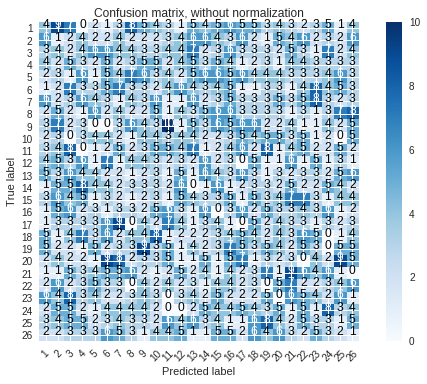

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
preds = dc_uniform.predict(test)
cnf_matrix = confusion_matrix(test_labels, preds)
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
plot_confusion_matrix(cnf_matrix, classes=labels,
                      title='Confusion matrix, without normalization')
micro = precision_recall_fscore_support(test_labels, preds, average='micro')
macro = precision_recall_fscore_support(test_labels, preds, average='macro')
print(classification_report(test_labels, preds))
micro1 = micro[2]
macro1 = macro[2]

# **Confusion Matrix για τον Dc Constant 1 Classifier**

Confusion matrix, without normalization
[[102   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [ 90   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [ 98   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [ 86   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [106   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [ 95   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [ 94   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [ 91   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [ 94   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0 

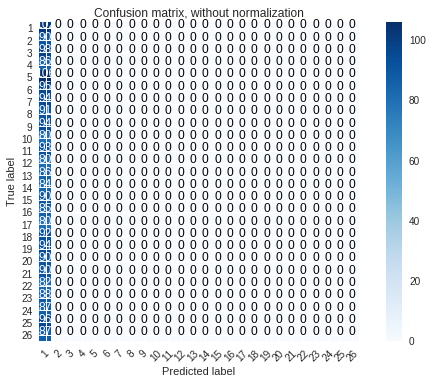

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
preds = dc_constant_1.predict(test)
cnf_matrix = confusion_matrix(test_labels, preds)
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
plot_confusion_matrix(cnf_matrix, classes=labels,
                      title='Confusion matrix, without normalization')
micro = precision_recall_fscore_support(test_labels, preds, average='micro')
macro = precision_recall_fscore_support(test_labels, preds, average='macro')
print(classification_report(test_labels, preds))
micro2 = micro[2]
macro2 = macro[2]

# **Confusion Matrix για τον Dc Constant 2 Classifier**

Confusion matrix, without normalization
[[  0 102   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0  90   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0  98   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0  86   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 106   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0  95   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0  94   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0  91   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0  94   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0 

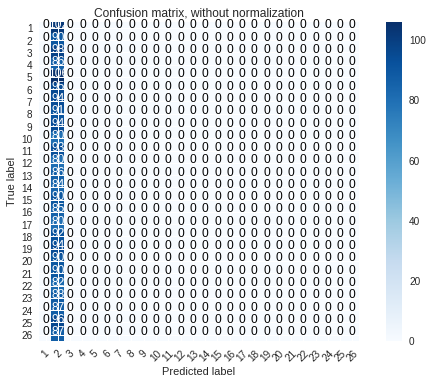

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
preds = dc_constant_2.predict(test)
cnf_matrix = confusion_matrix(test_labels, preds)
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
plot_confusion_matrix(cnf_matrix, classes=labels,
                      title='Confusion matrix, without normalization')
micro = precision_recall_fscore_support(test_labels, preds, average='micro')
macro = precision_recall_fscore_support(test_labels, preds, average='macro')
print(classification_report(test_labels, preds))
micro3 = micro[2]
macro3 = macro[2]

# **Confusion Matrix για τον Dc Constant 3 Classifier**

Confusion matrix, without normalization
[[  0   0 102   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0  90   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0  98   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0  86   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0 106   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0  95   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0  94   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0  91   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0  94   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0 

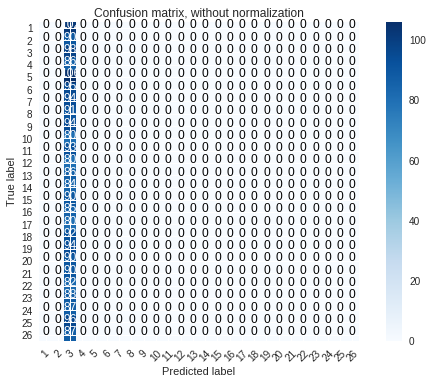

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
preds = dc_constant_3.predict(test)
cnf_matrix = confusion_matrix(test_labels, preds)
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
plot_confusion_matrix(cnf_matrix, classes=labels,
                      title='Confusion matrix, without normalization')
micro = precision_recall_fscore_support(test_labels, preds, average='micro')
macro = precision_recall_fscore_support(test_labels, preds, average='macro')
print(classification_report(test_labels, preds))
micro4 = micro[2]
macro4 = macro[2]

# **Confusion Matrix για τον Dc Constant 4 Classifier**

Confusion matrix, without normalization
[[  0   0   0 102   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0  90   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0  98   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0  86   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0 106   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0  95   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0  94   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0  91   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0  94   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0 

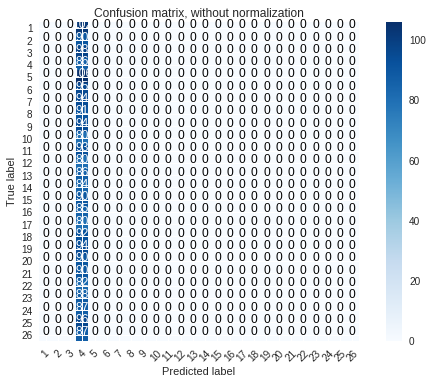

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
preds = dc_constant_4.predict(test)
cnf_matrix = confusion_matrix(test_labels, preds)
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
plot_confusion_matrix(cnf_matrix, classes=labels,
                      title='Confusion matrix, without normalization')
micro = precision_recall_fscore_support(test_labels, preds, average='micro')
macro = precision_recall_fscore_support(test_labels, preds, average='macro')
print(classification_report(test_labels, preds))
micro5 = micro[2]
macro5 = macro[2]

# **Confusion Matrix για τον Dc Most Frequent Classifier**



Confusion matrix, without normalization
[[  0   0   0   0   0   0   0   0   0 102   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  90   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  98   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  86   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 106   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  95   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  94   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  91   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  94   0   0   0   0   0   0   0   0
    0   0   0 

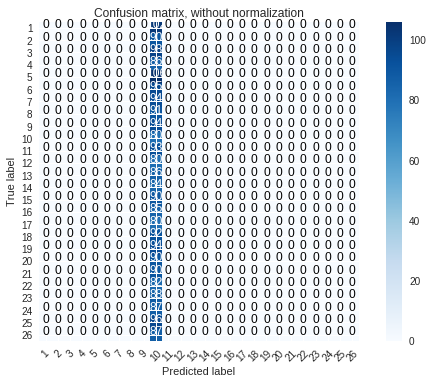

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
preds = dc_most_frequent.predict(test)
cnf_matrix = confusion_matrix(test_labels, preds)
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
plot_confusion_matrix(cnf_matrix, classes=labels,
                      title='Confusion matrix, without normalization')
micro = precision_recall_fscore_support(test_labels, preds, average='micro')
macro = precision_recall_fscore_support(test_labels, preds, average='macro')
print(classification_report(test_labels, preds))
micro6 = micro[2]
macro6 = macro[2]

# **Confusion Matrix για τον Dc Stratified Classifier**


Confusion matrix, without normalization
[[ 2  3  3  5  2  3  2  9  4  1  4  5  2  9  5  4  5 10  8  2  2  2  0  3
   4  3]
 [ 1  6  4  4  7  4  3  4  3  5  2  2  4  3  4  4  5  3  4  3  2  4  4  2
   0  3]
 [ 3  1  2  4  4  4  2  2  4  8  2  5  5  6  4  1  4  1  3  4  2  5  4  8
   5  5]
 [ 3  2  1  2  6  2  3  5  3  4  3  4  4  1  7  5  5  5  3  3  6  4  2  0
   2  1]
 [ 4  3  3  3  3  5 11  5  3  3  3  8  6  5  9  3  0  1  4  3  1  3  5  7
   5  0]
 [ 2  2  5  5  3  4  3  8  6  3  0  5  2  3  1  4  3  2  5  6  2  5  3  7
   5  1]
 [ 4  2  7  3  2  1  5  3  6  5  1  0  2  3  5  5  8  4  2  2  5  7  3  4
   2  3]
 [ 6  6  2  2  3  3  3  4  3  3  6  2  3  7  0  5  6  3  4  2  4  7  1  1
   1  4]
 [ 4  1  5  5  5  3  4  1  4  2  3  5  2  4  5  9  5  3  1  7  4  3  3  1
   2  3]
 [ 4  1  3  5  4  4  5  1  5  2  4  1  5  2  2  3  3  3  0  4  4  2  3  2
   4  4]
 [ 1  5  6  3  4  3  8  3  0  7  1  4  4  4  2  4  6  1  2  1  8  1  5  4
   2  4]
 [ 1  3  2  1  4  1  4  0  9  5  1  2  4  3  6 

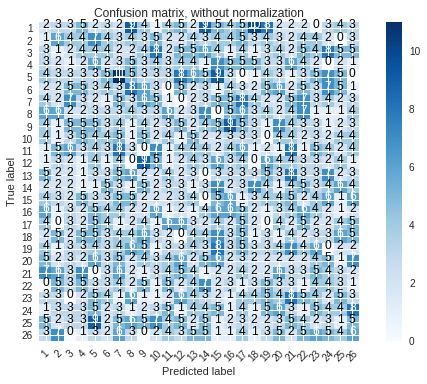

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
preds = dc_stratified.predict(test)
cnf_matrix = confusion_matrix(test_labels, preds)
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
plot_confusion_matrix(cnf_matrix, classes=labels,
                      title='Confusion matrix, without normalization')
micro = precision_recall_fscore_support(test_labels, preds, average='micro')
macro = precision_recall_fscore_support(test_labels, preds, average='macro')
print(classification_report(test_labels, preds))
micro7 = micro[2]
macro7 = macro[2]

# **Confusion Matrix για τον KNN**

Confusion matrix, without normalization
[[100   0   0   0   1   0   0   0   0   0   1   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0  74   0   9   5   0   0   0   0   0   0   0   0   0   0   2   0   0
    0   0   0   0   0   0   0   0]
 [  0   0  96   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   2]
 [  0   7   0  75   1   0   1   0   0   0   0   0   0   0   0   1   0   0
    0   0   0   1   0   0   0   0]
 [  1  16   0   6  82   0   0   0   0   0   0   0   0   0   0   1   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  85   0   0   0   0   0   1   1   0   0   1   0   0
    6   0   0   0   0   0   1   0]
 [  0   0   0   3   0   0  79   0   0   1   0   0   1   0   0   0   0   0
    0  10   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0  90   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  93   0   0   0   0   0   0   0   0   1
    0   0   0 

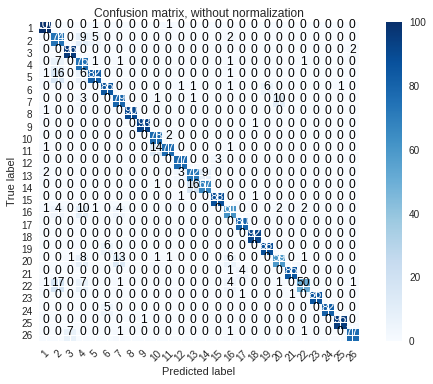

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
model_knn = knn.fit(train, train_labels)
preds = knn.predict(test)
knn_pred = preds
cnf_matrix = confusion_matrix(test_labels, preds)
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
plot_confusion_matrix(cnf_matrix, classes=labels,
                      title='Confusion matrix, without normalization')
micro = precision_recall_fscore_support(test_labels, preds, average='micro')
macro = precision_recall_fscore_support(test_labels, preds, average='macro')
print(classification_report(test_labels, preds))
micro8 = micro[2]
macro8 = macro[2]

# **Confusion Matrix για τον GNB**

Confusion matrix, without normalization
[[98  0  0  0  2  0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 7 32  0  0 45  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0  0  1  2  0
   0  1]
 [ 0  0 93  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  5]
 [ 4  1  0 44 31  0  0  0  0  0  0  0  0  0  0  1  0  0  0  1  0  3  1  0
   0  0]
 [ 2  2  0  1 98  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  1  0  0  0
   0  0]
 [ 0  0  0  0  0 82  0  0  0  0  0  0  0  1  0  0  0  0  4  0  0  0  3  5
   0  0]
 [ 0  0  0  0  1  0 69  0  0  4  0  0  1  0  0  1  1  0  0 16  0  0  0  0
   0  1]
 [ 1  0  0  0  0  0  0 89  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
   0  0]
 [ 1  0  0  0  0  1  0  0 84  0  0  0  0  0  0  0  0  3  0  0  0  0  3  1
   1  0]
 [ 0  0  0  0  0  0  1  0  0 67  8  0  0  0  0  0  2  0  0  0  0  0  1  0
   0  1]
 [ 0  0  0  0  1  0  0  0  0  4 85  0  0  0  0  0  0  0  0  1  0  0  1  0
   0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0 79  0  0  1 

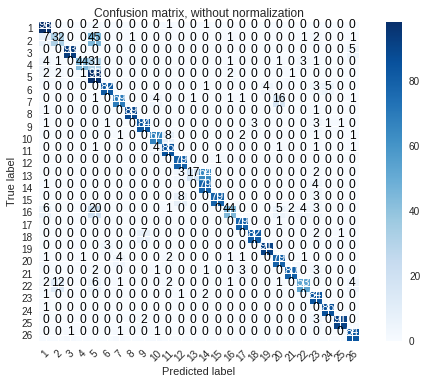

In [14]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# κάνουμε εκπαίδευση (fit) δηλαδή ουσιαστικά υπολογίζουμε μέση τιμή και διακύμανση για όλα τα χαρακτηριστικά και κλάσεις στο training set
model_gnb = gnb.fit(train, train_labels)
preds = gnb.predict(test)
gnb_preds = preds
cnf_matrix = confusion_matrix(test_labels, preds)
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
plot_confusion_matrix(cnf_matrix, classes=labels,
                      title='Confusion matrix, without normalization')
micro = precision_recall_fscore_support(test_labels, preds, average='micro')
macro = precision_recall_fscore_support(test_labels, preds, average='macro')
print(classification_report(test_labels, preds))
micro9 = micro[2]
macro9 = macro[2]

# **Confusion Matrix για τον MLPC**

Confusion matrix, without normalization
[[101   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0  81   0   0   3   0   0   0   0   0   0   0   0   0   0   4   0   0
    0   0   0   2   0   0   0   0]
 [  0   0  98   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   1   0  80   2   0   1   0   0   0   0   0   0   0   0   1   0   0
    0   0   0   1   0   0   0   0]
 [  0   2   0   0 100   0   0   0   0   0   0   0   0   0   0   1   0   0
    0   0   0   3   0   0   0   0]
 [  0   0   0   0   0  90   0   0   0   0   0   0   0   0   0   0   0   0
    4   0   1   0   0   0   0   0]
 [  0   0   0   0   0   1  91   0   0   0   0   0   0   0   0   0   0   0
    0   1   0   1   0   0   0   0]
 [  1   0   0   0   0   0   0  90   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  94   0   0   0   0   0   0   0   0   0
    0   0   0 

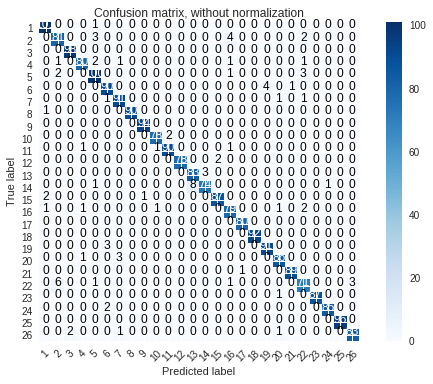

In [15]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
model_mlp = mlp.fit(train, train_labels)
preds = mlp.predict(test)
mlp_pred = preds
cnf_matrix = confusion_matrix(test_labels, preds)
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
plot_confusion_matrix(cnf_matrix, classes=labels,
                      title='Confusion matrix, without normalization')
micro = precision_recall_fscore_support(test_labels, preds, average='micro')
macro = precision_recall_fscore_support(test_labels, preds, average='macro')
print(classification_report(test_labels, preds))
micro10 = micro[2]
macro10 = macro[2]

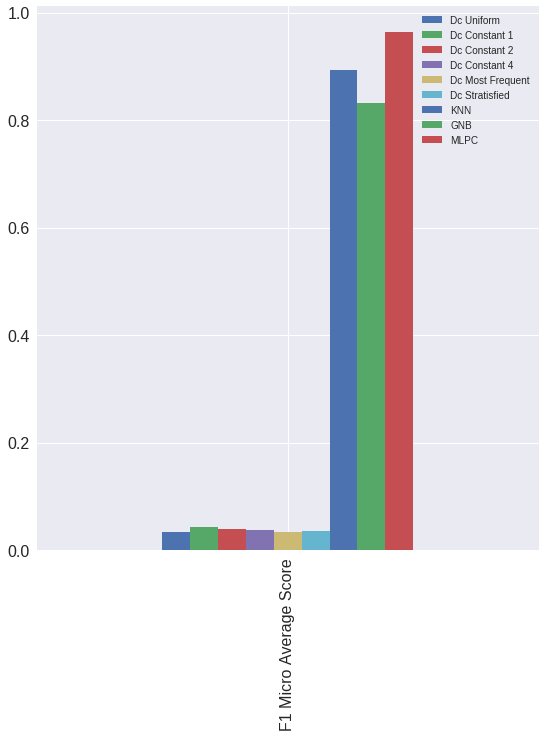

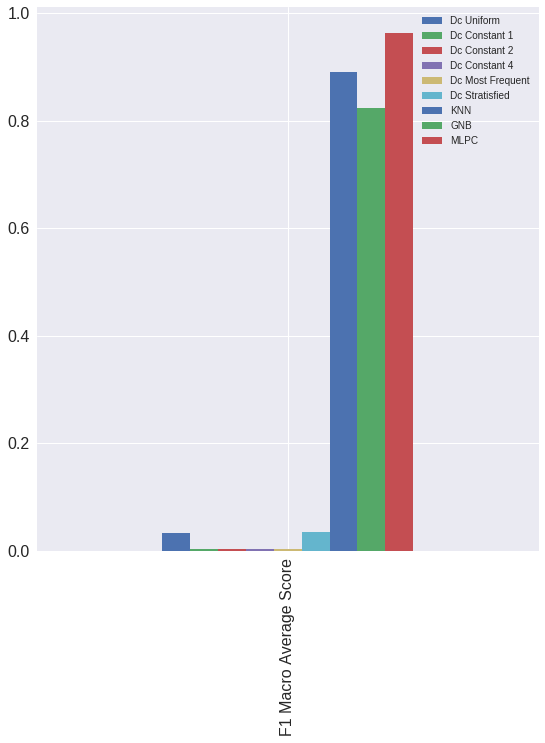

In [16]:
index = ['F1 Micro Average Score']
microall = pd.DataFrame({'Dc Uniform': micro1, 'Dc Constant 1': micro2, 'Dc Constant 2': micro3, 'Dc Constant 4': micro4, 'Dc Constant 4': micro5, 'Dc Most Frequent': micro6, 'Dc Stratisfied': micro7, 'KNN': micro8, 'GNB': micro9, 'MLPC': micro10}, index=index)
import matplotlib.pyplot as plt
ax = microall.plot(kind='bar', title ="", figsize=(9, 10), legend=True, fontsize=16)
plt.show()

index = ['F1 Macro Average Score']
macroall = pd.DataFrame({'Dc Uniform': macro1, 'Dc Constant 1': macro2, 'Dc Constant 2': macro3, 'Dc Constant 4': macro4, 'Dc Constant 4': macro5, 'Dc Most Frequent': macro6, 'Dc Stratisfied': macro7, 'KNN': macro8, 'GNB': macro9, 'MLPC': macro10}, index=index)
import matplotlib.pyplot as plt
ax = macroall.plot(kind='bar', title ="", figsize=(9, 10), legend=True, fontsize=16)
plt.show()

  Όπως είναι αναμενόμενο βλέπουμε από τα παραπάνω πως την καλύτερη επίδοση στο δείγμα μας παρείχε ο **MLP**. Ταυτόχρονα γίνεται εμφανές πως σε ένα τοσο ισορροπημένο δείγμα, ο ταξινομητής **DC_Constant**, είναι καταδικασμένος να αποτύχει. Αυτό γιατί ο αριθμός των κλάσεών μας είναι αρκετά μεγάλος(26), με αποτέλεσμα κάθε φορά να μας επιστρέφει την συχνότητα εμφάνισης της κλάσης, δηλαδή το ακριβές ποσοστό 3,08% που βρήκαμε και αρχικά.
Για τον ίδιο λόγο, παρατηρούμε εξίσου χαμηλά ποσοστά στους ταξινομητές **DC_Most_Frequent** και **DC_Stratisfied**. Συγκεκριμένα ο **DC Most Frequent**, προβλέπει πάντα την πιο συχνή κατηγορία στο training set, ενώ ο **DC Stratified** κάνει προβλέψεις διατηρώντας την κατανομή των κλάσεων στο training set. Έτσι από τη στιγμή που έχουμε 26 ομοιόμορφα κατανεμημένες κλάσεις, οι 2 αυτοί ταξινομητές θα έχουν πολύ χαμηλές τιμές τόσο στο Precision(4% όποια κλάση και αν επιλεχθεί) όσο και στο Recall(4%). 
    Ως τελευταία παρατήρηση θα μπορούσαμε να πούμε πως όσο προχωράμε σε πιο εξελιγμένους ταξινομητές, οι οποίοι χρησιμοποιούν και υπερπαραμέτρους που επιδέχονται βελτιστοποίηση, όπως είναι οι **KNN** και **MLP**, τόσο αυξάνεται ο αρμονικός μέσος της ακρίβειας και της ανάκλησης, δηλαδή το f1-score. Κάτι που είναι και το ζητούμενό μας. Αντιθέτως, ο **GNB**, καθώς δεν έχει υπερπαραμέτρους, δεν παρέχει το ίδιο ποσοστό επιτυχίας όσο οι προηγούμενοι δύο. Το score του όμως είναι εμφανώς ευξ

# **Δ. Βελτιστοποίηση ταξινομητών**

In [17]:
!pip install --upgrade imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.6/dist-packages (0.4.3)


In [18]:
#from imblearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
# φέρνουμε τις γνωστές μας κλάσεις για preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler # φέρνουμε τον StandarScaler ως transformer που έχει .transform kai ΄όχι ως scale()
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
train_variance = train.var(axis=0)
print(train_variance)
print(np.max(train_variance))

0      0.055815
1      0.103534
2      0.106228
3      0.092678
4      0.212563
5      0.324865
6      0.311992
7      0.285886
8      0.279569
9      0.267321
10     0.232316
11     0.200306
12     0.204459
13     0.224754
14     0.229210
15     0.226964
16     0.202412
17     0.175958
18     0.151251
19     0.134643
20     0.127753
21     0.131185
22     0.142929
23     0.149419
24     0.149176
25     0.148491
26     0.147668
27     0.147534
28     0.150406
29     0.165150
         ...   
587    0.124931
588    0.144201
589    0.139999
590    0.134134
591    0.134336
592    0.129368
593    0.113916
594    0.113675
595    0.110216
596    0.103711
597    0.092905
598    0.092027
599    0.087262
600    0.086678
601    0.091619
602    0.095134
603    0.095927
604    0.105657
605    0.107027
606    0.113407
607    0.111973
608    0.109758
609    0.107718
610    0.110832
611    0.112591
612    0.112995
613    0.112523
614    0.115458
615    0.110955
616    0.125234
Length: 617, dtype: floa

# Βελτιστοποίηση για τον GNB

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
n_components = [10, 30, 50]
vthreshold = [0.1, 0.15, 0.2] #προσαρμόζουμε τις τιμές μας στο variance που παρατηρήσαμε
clf = GaussianNB()
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('sampler', ros), ('GNB', clf)])

In [0]:
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=5, scoring='f1_micro', n_jobs=1)

In [25]:
import time
start_time = time.time()
estimator.fit(train, train_labels)
gnbpreds = estimator.predict(test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(test_labels, gnbpreds))

Συνολικός χρόνος fit και predict: 40.458911180496216 seconds
              precision    recall  f1-score   support

         1.0       0.92      0.94      0.93       102
         2.0       0.70      0.79      0.74        90
         3.0       0.98      0.96      0.97        98
         4.0       0.88      0.84      0.86        86
         5.0       0.84      0.89      0.86       106
         6.0       0.93      0.87      0.90        95
         7.0       0.92      0.84      0.88        94
         8.0       0.99      0.99      0.99        91
         9.0       0.96      0.98      0.97        94
        10.0       0.84      0.90      0.87        80
        11.0       0.85      0.82      0.84        93
        12.0       0.94      0.97      0.96        80
        13.0       0.82      0.87      0.84        86
        14.0       0.85      0.82      0.84        84
        15.0       0.98      0.97      0.97        90
        16.0       0.88      0.80      0.84        85
        17.0       0

# Βελτιστοποίηση για τον KNN

In [0]:
from sklearn.model_selection import GridSearchCV
n_components = [10, 30, 50]
vthreshold = [0.1, 0.15, 0.2] #προσαρμόζουμε τις τιμές μας στο variance που παρατηρήσαμε
k = [1, 5, 11, 41] # η υπερπαράμετρος του ταξινομητή
weight = ['uniform', 'distance']
metric = ['manhattan', 'minkowski']

In [0]:
# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρείς παραμέτρους
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
clf =  KNeighborsClassifier(n_jobs=1)
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('sampler', ros), ('KNN', clf)])

In [0]:
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, KNN__n_neighbors=k, KNN__metric=metric, KNN__weights=weight, pca__n_components=n_components), cv=5, scoring='f1_micro', n_jobs=1)

In [0]:
import time
start_time = time.time()
estimator.fit(train, train_labels)
preds = estimator.predict(test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(test_labels, preds))

In [0]:
print(estimator.best_estimator_)
print(estimator.best_params_)

# Βελτιστοποίηση για τον MLP

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
scaler = StandardScaler()
ros = RandomOverSampler()
activator = ['logistic', 'tanh', 'relu']

solver = ['lbfgs', 'adam']
lrate = ['constant', 'invscaling', 'adaptive']
max_iter = [100, 200, 300]
alpha = [ 0.0001,  0.001]
pca = PCA()
clf = MLPClassifier(hidden_layer_sizes=(100,))
pipe = Pipeline(steps=[('scaler', scaler), ('sampler', ros),  ('pca', pca), ('selector', selector), ('MLP', clf)])

In [0]:
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, MLP__activation=activator, MLP__solver = solver, 
                                    MLP__max_iter=max_iter, MLP__alpha=alpha, MLP__learning_rate=lrate), scoring = 'f1_micro', cv=5, n_jobs=1)

In [0]:
import time
start_time = time.time()
estimator.fit(train, train_labels)
mlppreds = estimator.predict(test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(test_labels, mlppreds))

In [0]:
print(estimator.best_estimator_)
print(estimator.best_params_)